**Context**:

You work as a data scientist for a consulting company and are working with one of their clients that produces video games.


**The client would like to know:**

- What are some major differences between the North American, European, and Japanese video game markets?

- What video game genres are trending in each market?

- What features about a video game are most indicative of its success?


**Data:**

Video game sales data for the last 30 years for video games with sales greater than 100 000 copies.


### 1. Have a look at the kinds of data available

I will start by getting a general idea of what data is available and how clean it is.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
vgsales = pd.read_csv('vgsales.csv')
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# check for duplicates
vgsales.duplicated().sum()

0

In [4]:
# check data types of each column
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
# check for missing data
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# look at Name column
Names = vgsales.Name.value_counts()
Names

Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
FIFA 14                          9
Madden NFL 07                    9
Ratatouille                      9
                                ..
Starcraft 64                     1
Mother 3                         1
Group S Challenge                1
Discovery Kids: Spider Quest     1
DokuSui: DokiDoki Suikoden       1
Name: Name, Length: 11493, dtype: int64

There are 11493 unique names represented in this dataset out of a total of 16598 rows.

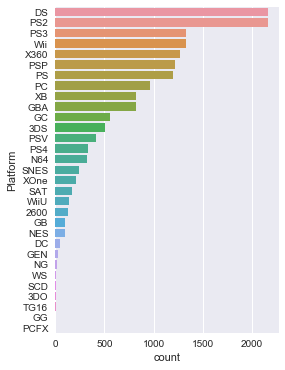

In [7]:
# look at Platform column

platforms = vgsales.Platform.value_counts()

f, ax = plt.subplots(figsize=(4, 6))
sns.countplot(y='Platform', data=vgsales, order=platforms.index);

There are 31 unique platforms represented in this dataset.

n unique years: 39
min year: 1980.0
max year: 2020.0


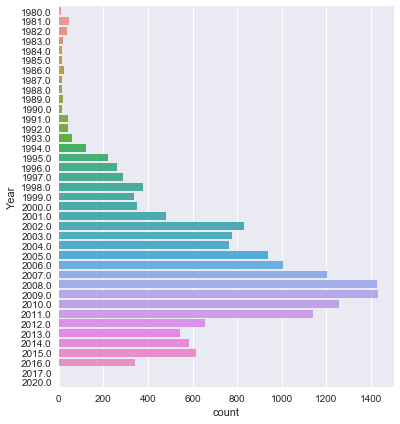

In [8]:
# look at Year

print('n unique years:', vgsales.Year.nunique())
print('min year:', vgsales.Year.min())
print('max year:', vgsales.Year.max())

f, ax = plt.subplots(figsize=(6, 7))
sns.countplot(y='Year', data=vgsales);

There are 39 years represented in this dataset. The years range from 1980 to 2020, but there is little data available for 2017 and 2020, and there is no data available for 2018 and 2019.

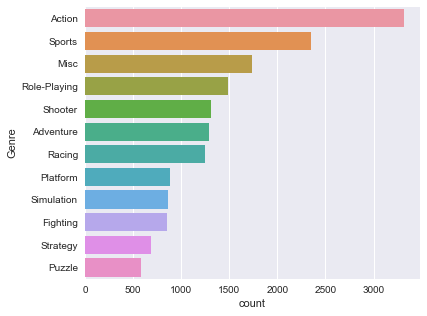

In [9]:
# look at Genre column

genre = vgsales.Genre.value_counts()

f, ax = plt.subplots(figsize=(6, 5))
sns.countplot(y='Genre', data=vgsales, order=genre.index);

There are 11 unique genres represented in this dataset and one miscellaneous genre category.

In [10]:
# look at Publisher column
vgsales.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Epic Games                         1
Havas Interactive                  1
Xing Entertainment                 1
UEP Systems                        1
Intergrow                          1
Name: Publisher, Length: 578, dtype: int64

There are 578 unique publishers represented in this dataset.

In [11]:
# look at average sales metrics

sales = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sales.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


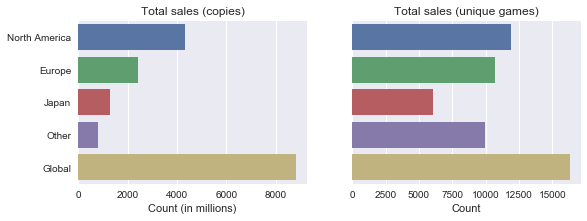

In [25]:
# get total sales metrics

metrics = pd.DataFrame()
metrics['total_sales_copies'] = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
metrics['total_sales_games'] = vgsales[vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] > 0].count()
metrics.reset_index(inplace=True)

# visualize  total sales metrics

f, ax = plt.subplots(1, 2, figsize=(9, 3))

sns.barplot(x='total_sales_copies', y='index', data=metrics, ax=ax[0])
sns.barplot(x='total_sales_games', y='index', data=metrics, ax=ax[1])

# set labels
ax[0].set_xlabel('Count (in millions)')
ax[1].set_xlabel('Count')

ax[0].set_ylabel(''); ax[1].set_ylabel('')

ax[0].set_yticklabels(['North America', 'Europe', 'Japan', 'Other', 'Global'])
ax[1].set_yticklabels('')

ax[0].set_title('Total sales (copies)')
ax[1].set_title('Total sales (unique games)');

**Summary of data and notes**:

- There are 11493 unique games in the database out of a total of 16598 ranked games.

    - I am guessing that the reason that some games are present more than once is because they were released in multiple years or by multiple publishers or on multiple platforms (or perhaps they fall under more than one genre category?).



- There are 31 platforms, 12 genres, and 578 publishers.



- The data are from 1980-2020 but the bulk of the data is from ~1994-2016.

    - Note: the Year column is the year of the game's release so sales are total sales since release. I don't know how the sales of video games are distributed in time after initial release so I will assume they are evenly distributed over time since initial release.


- There is a small amount of missing data for Year and Publisher.

    - I have a hunch that rows with null values for Year might be the missing datapoints from 2018-2019. I will see if there is a way that I can confirm this.
    
    - As for the rows with with missing Publisher data, I will check if they are randomly representative of data distributions and if so I will drop them.
    


- North America has the largest market share followed by Europe, Japan, and Other. Japan buys only about half the types of video games available compared to any of the other markets

**Plan of action:**

To answer the first question (What are some major differences between the North American, European, and Japanese video game markets?) I will provide summary statistics that compare the sales between the three markets.

To answer the second question (What video game genres are trending in each market?) I will look at preferences and sales for games released in the last 10 years.

To answer the third question (What features about a video game are most indicative of its success?) I will use global sales as a metric of success, and I will use a regression model to examine the relationship of that success to various feature of a game. I will use some of the features given and I will also engineer additional features.

### 2. Clean and prepare the data

#### See if I can confirm hunch that rows with nans in Year are from 2018-2019

In [13]:
# get rows with null values in Year
tmp = vgsales[vgsales.Year.isnull()]
tmp.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


It looks like some of the game name's include a year. I'll search through the names to see if any of them include '2018', or '2019'.

In [14]:
print(len(tmp[tmp['Name'].str.contains('2018')]))
print(len(tmp[tmp['Name'].str.contains('2019')]))

0
0


None of them include '2018' or '2019'.

I'll check if any of the platforms or publishers are new - maybe I could use that as a proxy.

In [15]:
print(vgsales.groupby(['Platform']).Year.min().sort_values(ascending=False).head())
print(vgsales.groupby(['Publisher']).Year.min().sort_values(ascending=False).head())

Platform
XOne    2013.0
PS4     2013.0
WiiU    2012.0
PSV     2011.0
3DS     2011.0
Name: Year, dtype: float64
Publisher
MLB.com                  2016.0
Hello Games              2016.0
Inti Creates             2016.0
Insomniac Games          2016.0
Introversion Software    2016.0
Name: Year, dtype: float64


Not new enough. Hunch remains unconfirmed (and disproven for some rows).

I'll go ahead with my alternative plan for dealing with the missing values.

#### Take care of  rows with null values in Year and Publisher

In [16]:
# get rows with nulls
tmp = vgsales[vgsales.Year.isnull() | vgsales.Publisher.isnull()]

In [17]:
# check if the rows with nulls are on average similar to the general data
print(tmp[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe(), '\n')

         NA_Sales    EU_Sales    JP_Sales  Other_Sales  Global_Sales
count  307.000000  307.000000  307.000000   307.000000    307.000000
mean     0.212704    0.089381    0.021987     0.028795      0.353322
std      0.405871    0.198517    0.084750     0.071944      0.586598
min      0.000000    0.000000    0.000000     0.000000      0.010000
25%      0.010000    0.000000    0.000000     0.000000      0.050000
50%      0.090000    0.020000    0.000000     0.010000      0.160000
75%      0.230000    0.100000    0.000000     0.020000      0.380000
max      4.260000    2.360000    0.770000     0.710000      5.230000 



Rows with nulls have similar average sales metrics to the rest of the data.

In [18]:
# check the total sales amount for rows with nulls
print(tmp[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum())

NA_Sales         65.30
EU_Sales         27.44
JP_Sales          6.75
Other_Sales       8.84
Global_Sales    108.47
dtype: float64


Rows with nulls represent ~1% of total number of sales.

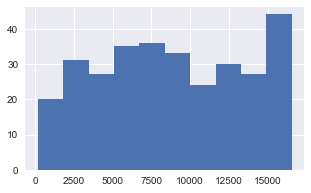

In [19]:
# check that the rows with nulls are representative of the general data
plt.subplots(figsize=(5,3))
plt.hist(tmp.Rank);

Rows with nulls are evenly distributed throughout the data.

Given the above, I feel comfortable dropping rows with nulls for the purposes of this analysis.

In [20]:
# drop rows with null values
vgsales = vgsales.dropna().reset_index(drop=True)

#### Normalize profits by number of years on the market

Because the games have all been on the market for different amounts of time, I will normalize numbers of copies sold by the number of years on the market. I will only use data from before 2017 since they are only 4 datapoints after that period (and one is an outlier).

In [21]:
# make a new dataframe with 2017-2020 removed
df = vgsales[vgsales.Year < 2017].reset_index(drop=True)

In [22]:
# normalize sales by number of years on the market

df['NA_avg'] = df['NA_Sales'] / (2021 - vgsales['Year'])
df['EU_avg'] = df['EU_Sales'] / (2021 - vgsales['Year'])
df['JP_avg'] = df['JP_Sales'] / (2021 - vgsales['Year'])
df['Other_avg'] = df['Other_Sales'] / (2021 - vgsales['Year'])
df['Global_avg'] = df['Global_Sales'] / (2021 - vgsales['Year'])

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_avg,EU_avg,JP_avg,Other_avg,Global_avg
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2.766000,1.934667,0.251333,0.564000,5.516000
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.807778,0.099444,0.189167,0.021389,1.117778
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1.219231,0.990769,0.291538,0.254615,2.755385
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1.312500,0.917500,0.273333,0.246667,2.750000
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.450800,0.355600,0.408800,0.040000,1.254800


### 3. What are some major differences between the North American, European, and Japanese video game markets?

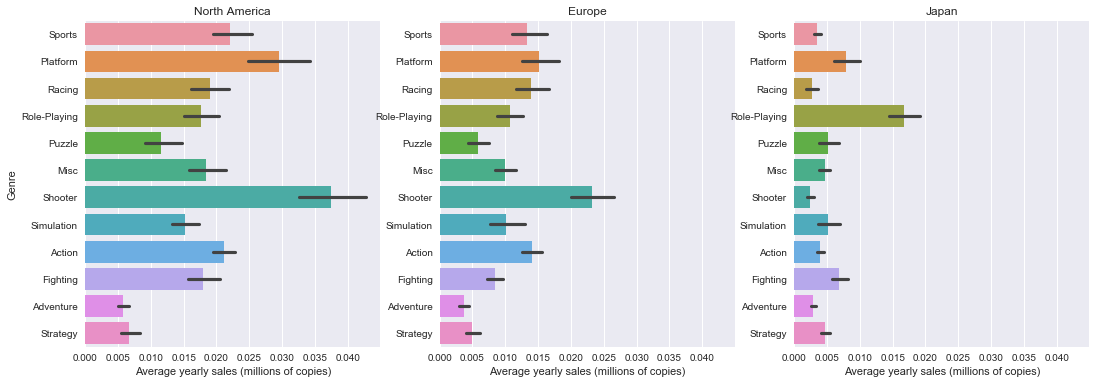

In [23]:
# look at genres

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 6))

sns.barplot(x='NA_avg', y='Genre', data=df, ax=ax[0]);
sns.barplot(x='EU_avg', y='Genre', data=df, ax=ax[1]);
sns.barplot(x='JP_avg', y='Genre', data=df, ax=ax[2]);

ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_xlabel('Average yearly sales (millions of copies)')
ax[1].set_xlabel('Average yearly sales (millions of copies)')
ax[2].set_xlabel('Average yearly sales (millions of copies)')

ax[0].set_title('North America')
ax[1].set_title('Europe')
ax[2].set_title('Japan');

North Americans and Europeans have broader tastes compared to Japanese. North Americans and Europeans like shooting and action games the most whereas Japanese like shooting games the least. Japanese prefer role-playing games by far over any other genre.

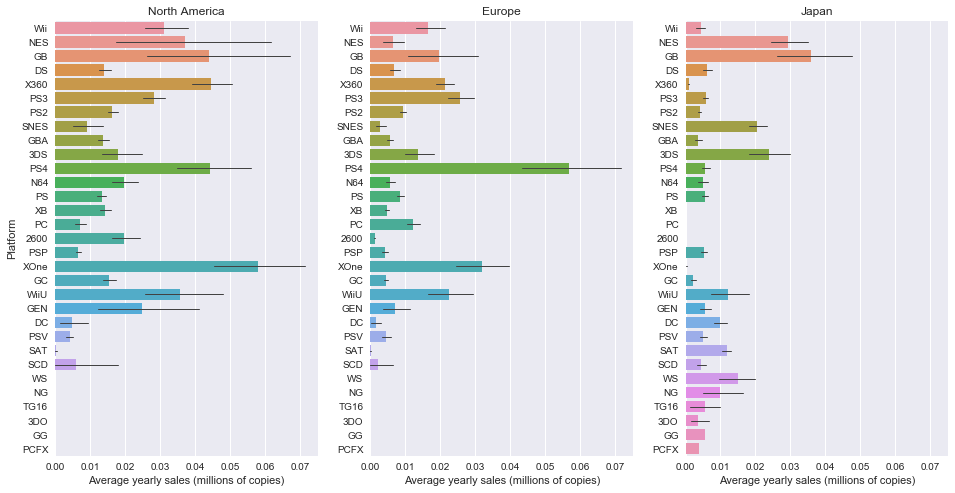

In [24]:
# look at platform

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 8))

sns.barplot(x='NA_avg', y='Platform', data=df, ax=ax[0], errwidth=1);
sns.barplot(x='EU_avg', y='Platform', data=df, ax=ax[1], errwidth=1);
sns.barplot(x='JP_avg', y='Platform', data=df, ax=ax[2], errwidth=1);

ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_xlabel('Average yearly sales (millions of copies)')
ax[1].set_xlabel('Average yearly sales (millions of copies)')
ax[2].set_xlabel('Average yearly sales (millions of copies)')

ax[0].set_title('North America')
ax[1].set_title('Europe')
ax[2].set_title('Japan');

There are some significant differences in platform usage between the three major markets. North Americans and Europeans spend the most money on the PS4 and XOne platforms whereas those platforms are rarely used in Japan. If I had more time I would see if this is because preferred games or genres are only available on some platforms and not others.

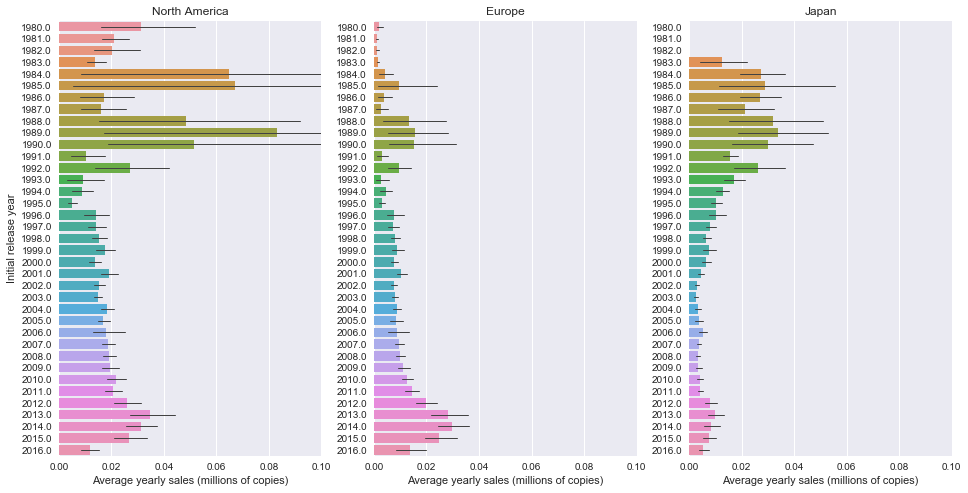

In [26]:
# look at Year

df['year_cat'] = df.Year.astype('category') # make categorical (for plotting purposes)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))

sns.barplot(x='NA_avg', y='year_cat', data=df, ax=ax[0], errwidth=1);
sns.barplot(x='EU_avg', y='year_cat', data=df, ax=ax[1], errwidth=1);
sns.barplot(x='JP_avg', y='year_cat', data=df, ax=ax[2], errwidth=1);

ax[0].set_ylabel('Initial release year')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_xlabel('Average yearly sales (millions of copies)')
ax[1].set_xlabel('Average yearly sales (millions of copies)')
ax[2].set_xlabel('Average yearly sales (millions of copies)')

ax[0].set_title('North America')
ax[1].set_title('Europe')
ax[2].set_title('Japan')

ax[0].set_xlim(right=0.1)
ax[1].set_xlim(right=0.1)
ax[2].set_xlim(right=0.1);

It looks like for all markets there is a tendency for higher average yearly sales of games released in the mid-80s and 90s or since ~2010. There are also more North American sales of games from the early 80s (I've made the assumption that those sales were made evenly since release but it is possible that there were simply higher numbers of video games sold in North America in the 80s compared to the 90s).

### 4. What video game genres are trending in each market?


To evaluate recent trends I will use data from video games released in 2012 or later, and the metric I will look at is the total number of copies sold for each genre. I will not compare these values to those for video games released earlier because the data given here is not broken down by when the sales occurred - it is just the total sales since the original release.

In [40]:
# get the total nubmer of copies sold for each genre since 2011

trends = pd.DataFrame()

# get total sales since 2012 of each genre for each market
trends['NA'] = df[df.Year > 2011].groupby(['Genre']).NA_Sales.sum()
trends['EU'] = df[df.Year > 2011].groupby(['Genre']).EU_Sales.sum()
trends['JP'] = df[df.Year > 2011].groupby(['Genre']).JP_Sales.sum()

# normalize by total sales across all genres for each market
trends = trends / trends.sum()
trends.reset_index(inplace=True)

trends

,Genre,NA,EU,JP
0,Action,0.306268,0.322403,0.275594
1,Adventure,0.014899,0.018518,0.042915
2,Fighting,0.034576,0.022197,0.049952
3,Misc,0.066966,0.054179,0.067193
4,Platform,0.044521,0.042979,0.046084
5,Puzzle,0.002045,0.002790,0.011494
6,Racing,0.029534,0.055553,0.013374
7,Role-Playing,0.104452,0.092892,0.334622
8,Shooter,0.237521,0.216775,0.046890
9,Simulation,0.013577,0.026725,0.055377


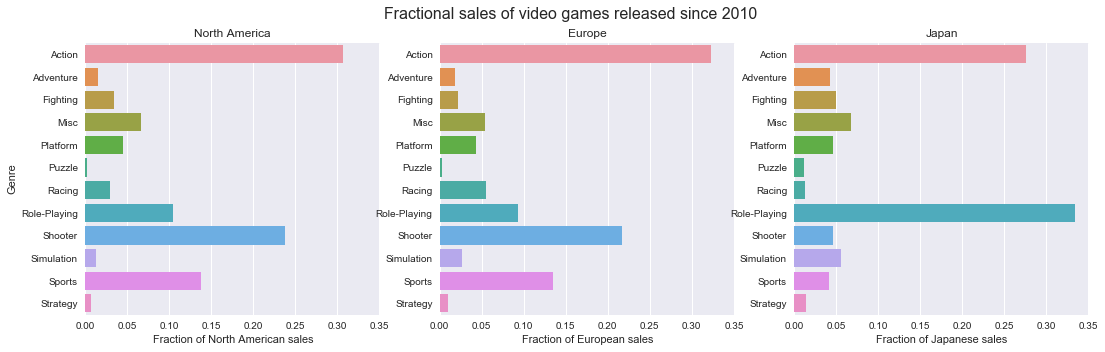

In [41]:
# visualize

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 5))

sns.barplot(x='NA', y='Genre', data=trends, ax=ax[0])
sns.barplot(x='EU', y='Genre', data=trends, ax=ax[1])
sns.barplot(x='JP', y='Genre', data=trends, ax=ax[2])

fig.suptitle('Fractional sales of video games released since 2010', fontsize=16)

ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_xlabel('Fraction of North American sales')
ax[1].set_xlabel('Fraction of European sales')
ax[2].set_xlabel('Fraction of Japanese sales')

ax[0].set_title('North America')
ax[1].set_title('Europe')
ax[2].set_title('Japan');



Since 2012 the top grossing genres in North America and Europe are Action, Shooter, and Sports, together making up close to 70% of total video game sales. In Japan, however, Role-Playing and Action are by far the most popular genres, together accounting for ~60% of video game sales.

This is different than what I found above when I looked at the totals across all years - it looks like recent Action videogames are much more popular than older Action video games, and this difference is especially pronounced in Japan.

### 5. What features about a video game are most indicative of its success?

To answer this question I will use total sales as a metric of success, and I will build a regression model to predict sales of a game based on various features.

**Feature engineering**

I will one-hot-encode Genre and Platform. There are more than 500 categories of Publisher, which is a lot to one-hot-encode, and I think a better predictor of sales would be publisher popularity so I will engineer a feature that is a measure of publisher popularity. I will also include features for number of times a game was released, number of platforms a game is on, number of publishers a game is published by, and the number of years since the game was first released.

**Model selection**

The model should be able to handle mixed categorical and continous features Also, I expect that the features will have multicollinearity because there are probably some publishers that only use specific platforms or some platforms that are mainly for specific genres etc. (If I had time I would try to figure out what those relationships are and engineer the features to remove those effects.)

I will therefore use both enembling tree-based regression as well as linear regression in order capitalize on the strength of linear models in dealing with categorical features and the strength of forests in handling non-linear relationships and multicollinearity.


Start by encoding the Platform and Genre columns by creating dummy variables.

In [42]:
# generate dummy variables for each genre (each game has only a single genre)

X_dummies_genre = pd.get_dummies(df[['Genre']], drop_first=True)

# add name column
X_dummies_genre['Name'] = df.Name

# group by name
X_dummies_genre = X_dummies_genre.groupby('Name', as_index=False).max()

X_dummies_genre

,Name,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,'98 Koshien,0,0,0,0,0,0,0,0,0,1,0
1,.hack//G.U. Vol.1//Rebirth,0,0,0,0,0,0,1,0,0,0,0
2,.hack//G.U. Vol.2//Reminisce,0,0,0,0,0,0,1,0,0,0,0
3,.hack//G.U. Vol.2//Reminisce (jp sales),0,0,0,0,0,0,1,0,0,0,0
4,.hack//G.U. Vol.3//Redemption,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11317,thinkSMART FAMILY!,0,0,1,0,0,0,0,0,0,0,0
11318,thinkSMART: Chess for Kids,0,0,1,0,0,0,0,0,0,0,0
11319,uDraw Studio,0,0,1,0,0,0,0,0,0,0,0
11320,uDraw Studio: Instant Artist,0,0,1,0,0,0,0,0,0,0,0


In [43]:
# get dummy variables for each platform

X_dummies_platform = pd.get_dummies(df[['Platform']]) # do not drop first (because some games are on multiple platforms)

# add name column
X_dummies_platform['Name'] = df.Name

# group by name (this will take into account games that are on multiple platforms)
X_dummies_platform = X_dummies_platform.groupby('Name', as_index=False).max()

X_dummies_platform

,Name,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,'98 Koshien,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,.hack//G.U. Vol.1//Rebirth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,.hack//G.U. Vol.2//Reminisce,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,.hack//G.U. Vol.2//Reminisce (jp sales),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,.hack//G.U. Vol.3//Redemption,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11317,thinkSMART FAMILY!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11318,thinkSMART: Chess for Kids,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11319,uDraw Studio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11320,uDraw Studio: Instant Artist,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


Then engineer some new features.

In [44]:
X_engineered = pd.DataFrame()

# number of companies that publish this game (1 for most)
X_engineered['n_publishers'] = df.groupby('Name').Publisher.nunique()

# number of platforms this game is on
X_engineered['n_platforms'] = df.groupby('Name').Platform.nunique()

# years since first release of this game
X_engineered['years_on_market'] = 2020 - df.groupby('Name').Year.min()

# total number of releases of this game (1 for most)
X_engineered['n_releases'] = df.groupby('Name').Year.nunique()

X_engineered

,n_publishers,n_platforms,years_on_market,n_releases
Name,,,,
'98 Koshien,1,1,22.0,1
.hack//G.U. Vol.1//Rebirth,1,1,14.0,1
.hack//G.U. Vol.2//Reminisce,1,1,14.0,1
.hack//G.U. Vol.2//Reminisce (jp sales),1,1,14.0,1
.hack//G.U. Vol.3//Redemption,1,1,13.0,1
...,...,...,...,...
thinkSMART FAMILY!,1,1,10.0,1
thinkSMART: Chess for Kids,1,1,9.0,1
uDraw Studio,1,1,10.0,1


Engineer a feature encoding publisher popularity.

In [45]:
# count number of unique games published by each publisher
publisher_popularity = df.groupby(['Publisher']).Name.nunique().to_frame().reset_index()
publisher_popularity.rename(columns={'Name':'n_games'}, inplace=True)
publisher_popularity

,Publisher,n_games
0,10TACLE Studios,3
1,1C Company,3
2,20th Century Fox Video Games,5
3,2D Boy,1
4,3DO,30
...,...,...
571,id Software,1
572,imageepoch Inc.,2
573,inXile Entertainment,1
574,"mixi, Inc",1


In [46]:
# merge with df on the Publisher column
df = pd.merge(df, publisher_popularity, left_on='Publisher', right_on='Publisher', how='left')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_avg,EU_avg,JP_avg,Other_avg,Global_avg,year_cat,n_games
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2.766000,1.934667,0.251333,0.564000,5.516000,2006.0,662
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.807778,0.099444,0.189167,0.021389,1.117778,1985.0,662
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1.219231,0.990769,0.291538,0.254615,2.755385,2008.0,662
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1.312500,0.917500,0.273333,0.246667,2.750000,2009.0,662
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.450800,0.355600,0.408800,0.040000,1.254800,1996.0,662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16282,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.002000,0.000000,0.000000,0.000000,0.002000,2002.0,15
16283,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.000714,0.000000,0.000000,0.000000,0.000714,2003.0,52
16284,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.000588,2008.0,414
16285,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000,0.000769,0.000000,0.000000,0.000769,2010.0,3


In [47]:
# add publisher popularity metric to features
# (if a game is published by more than one publisher, get the popularity level of the most popular one)

X_engineered['publisher_popularity'] = df.groupby('Name').n_games.max()
X_engineered

,n_publishers,n_platforms,years_on_market,n_releases,publisher_popularity
Name,,,,,
'98 Koshien,1,1,22.0,1,1
.hack//G.U. Vol.1//Rebirth,1,1,14.0,1,774
.hack//G.U. Vol.2//Reminisce,1,1,14.0,1,774
.hack//G.U. Vol.2//Reminisce (jp sales),1,1,14.0,1,774
.hack//G.U. Vol.3//Redemption,1,1,13.0,1,774
...,...,...,...,...,...
thinkSMART FAMILY!,1,1,10.0,1,13
thinkSMART: Chess for Kids,1,1,9.0,1,5
uDraw Studio,1,1,10.0,1,406


In [48]:
# scale values to between 0 and 1
X_engineered = X_engineered / X_engineered.max()

# set Name as a column rather than index
X_engineered = X_engineered.reset_index()

X_engineered

,Name,n_publishers,n_platforms,years_on_market,n_releases,publisher_popularity
0,'98 Koshien,0.25,0.1,0.550,0.2,0.001292
1,.hack//G.U. Vol.1//Rebirth,0.25,0.1,0.350,0.2,1.000000
2,.hack//G.U. Vol.2//Reminisce,0.25,0.1,0.350,0.2,1.000000
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.25,0.1,0.350,0.2,1.000000
4,.hack//G.U. Vol.3//Redemption,0.25,0.1,0.325,0.2,1.000000
...,...,...,...,...,...,...
11317,thinkSMART FAMILY!,0.25,0.1,0.250,0.2,0.016796
11318,thinkSMART: Chess for Kids,0.25,0.1,0.225,0.2,0.006460
11319,uDraw Studio,0.25,0.1,0.250,0.2,0.524548
11320,uDraw Studio: Instant Artist,0.25,0.2,0.225,0.2,0.524548


Add all features together

In [49]:
# chain merge the three dataframes on the Name column
X = X_dummies_genre.merge(X_dummies_platform, on='Name').merge(X_engineered, on='Name')

# drop name column
X = X.drop(columns='Name')
X

,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,...,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,n_publishers,n_platforms,years_on_market,n_releases,publisher_popularity
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0.25,0.1,0.550,0.2,0.001292
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.25,0.1,0.350,0.2,1.000000
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.25,0.1,0.350,0.2,1.000000
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.25,0.1,0.350,0.2,1.000000
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.25,0.1,0.325,0.2,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11317,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0.25,0.1,0.250,0.2,0.016796
11318,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.25,0.1,0.225,0.2,0.006460
11319,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0.25,0.1,0.250,0.2,0.524548
11320,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0.25,0.2,0.225,0.2,0.524548


Prepare data for modelling

In [84]:
# get dependent variable
y = df.groupby('Name').Global_Sales.sum()

# transform dependent variable (to bring in the outliers)
y = np.sqrt(y)

In [85]:
# split data into training and testing groups

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Train and test model

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
gb = GradientBoostingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1, n_estimators=100)
lr = LinearRegression()

# fit regression models to the training data
gb.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train);

In [87]:
# calculate the training and test errors
print(mean_squared_error(y_train, gb.predict(X_train)), mean_squared_error(y_test, gb.predict(X_test)))
print(mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, rf.predict(X_test)))
print(mean_squared_error(y_train, lr.predict(X_train)), mean_squared_error(y_test, lr.predict(X_test)))

0.20125102842769008 0.20605165294574984
0.06501608098356318 0.2217538280409382
0.24800171140353686 0.23927670458178657


In [88]:
# get top 10 features of each model

results_gb = pd.DataFrame({'feature':X_train.columns ,'importance':abs(gb.feature_importances_)})
results_gb = results_gb.sort_values(by='importance', ascending=False).reset_index(drop=True).head(10)

results_rf = pd.DataFrame({'feature':X_train.columns ,'importance':abs(rf.feature_importances_)})
results_rf = results_rf.sort_values(by='importance', ascending=False).reset_index(drop=True).head(10)

results_lr = pd.DataFrame({'feature':X_train.columns ,'importance':abs(lr.coef_)})
results_lr = results_lr.sort_values(by='importance', ascending=False).reset_index(drop=True).head(10)

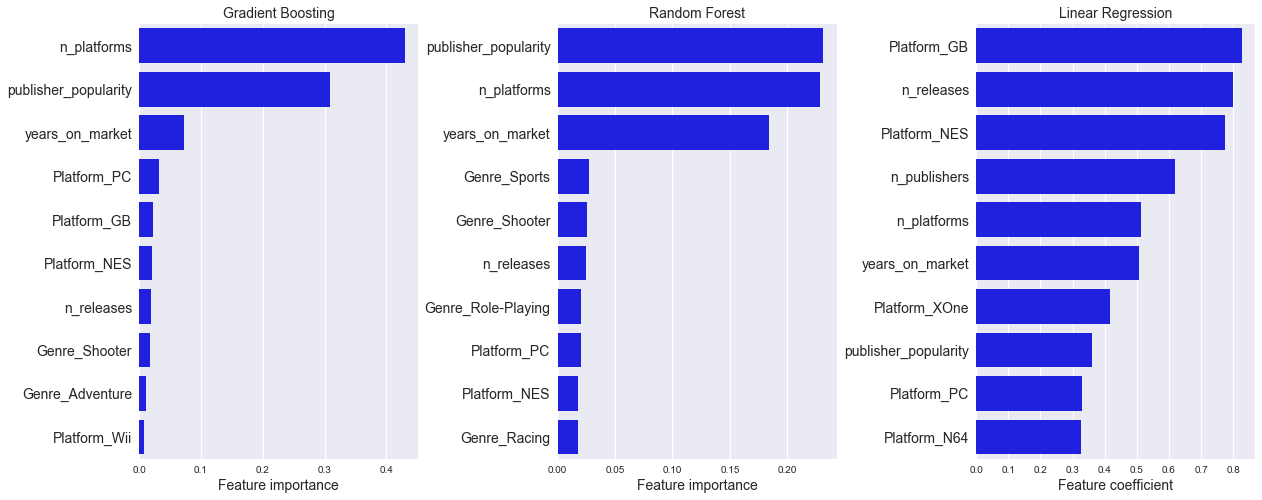

In [89]:
#visualize

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.subplots_adjust(wspace=0.5)

sns.barplot(x='importance', y='feature', data=results_gb, color='b', ax=ax[0])
sns.barplot(x='importance', y='feature', data=results_rf, color='b', ax=ax[1])
sns.barplot(x='importance', y='feature', data=results_lr, color='b', ax=ax[2])

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_yticklabels(labels=results_gb.feature, fontsize=14)
ax[1].set_yticklabels(labels=results_rf.feature, fontsize=14)
ax[2].set_yticklabels(labels=results_lr.feature, fontsize=14)

ax[0].set_xlabel('Feature importance', fontsize=14)
ax[1].set_xlabel('Feature importance', fontsize=14)
ax[2].set_xlabel('Feature coefficient', fontsize=14)

ax[0].set_title('Gradient Boosting', fontsize=14)
ax[1].set_title('Random Forest', fontsize=14)
ax[2].set_title('Linear Regression', fontsize=14);

It looks like some of the most important features in game success are the number of platforms the game is on, the popularity of the publisher that publishes the game, and the length of time the game has been on the market. The number of times a game has been released may also be related to success. Specific genres or platforms are less predictive of success, although the linear model did pull out the game-boy platform as most related to success.